In [1]:
#! /usr/bin/env python

# to make size- mag plot for stars. 
#Want to use actual stars for modelling- not just reserve. 
#Also want to use one exposure and one ccd: https://cdcvs.fnal.gov/redmine/projects/deswlwg/wiki/PSF_Modeling
#Need flags for cadidate and psf star

from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits


def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
   
#des scheme
colors = ['#601A4A', '#EE442F','#63ACBE']

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((55, 94, 50)) 
c_23=rgb_to_hex((121, 183, 179)) 

In [2]:
def add_to_list(filter, vlist, value):
    if 'griz' in vlist.keys():
        #print("1")
        vlist['griz'].append(value)
    if filter not in vlist.keys():
        #print("2")
        vlist[filter] = []
    if 'riz' in vlist.keys() and 'g' not in filter:
        #print("3")
        vlist['riz'].append(value)
    vlist[filter].append(value)
    #print(vlist)

In [11]:
def get_data(exps, work, fwhm_list, med_size_list, mean_size_list, tag):

    import astropy.io.fits as pyfits
    import os
    #expinfo_file=s.path.join(cat_dir, exp + "exp_psf_cat_" + exp + ".fits")
  
    print(work)
    cat_dir = work
    print(exps)
   
    for exp in exps:
        i=0
        if i<10:
            cat_file = os.path.join(cat_dir, exp + "/exp_psf_cat_" + exp + ".fits")

            with fitsio.FITS(cat_file) as pyf:
                if pyf['stars']['star_flag'] != 0:
                    band=pyf['info']['band'].read()
                    band=band[0]
                    #print (pyf['stars']['star_flag'] != 0 )
                    fwhm=np.median(pyf['info']['star_fwhm'].read())

                
                    
                    
            #print(band)
            add_to_list(band, fwhm_list, fwhm)
            i+=1

    print('\nFinished processing all exposures')

In [12]:
file="test.dat" #exps.da
tag="exp_psf_cat_"
work="/global/project/projectdirs/des/wl/desdata/users/mjarvis/y3a1-v29/"
exps=np.loadtxt("/global/project/projectdirs/des/wl/desdata/users/mjarvis/y3a1-v29/exps.dat").astype(int)

print('work dir = ', work)

"""if args.file != '':
    print('Read file ',file)
    with open(file) as fin:
        data = [ line.split() for line in fin ]
    runs, exps = zip(*data)
else:
    runs = args.runs
    exps = args.exps
"""
fwhm_list = {}
med_size_list = {}
mean_size_list = {}

get_data(exps.astype(str), work, fwhm_list, med_size_list, mean_size_list, tag)
print(fwhm_list)


work dir =  /global/project/projectdirs/des/wl/desdata/users/mjarvis/y3a1-v29/
/global/project/projectdirs/des/wl/desdata/users/mjarvis/y3a1-v29/
['349809' '349810' '349811' ... '492875' '492876' '492877']

Finished processing all exposures
{'i': [0.9183799522034548, 0.9701960700459199, 0.9302668274481263, 0.8271591282456242, 0.8403850940563662, 0.8299629741850448, 0.8116000658787442, 0.8315000076333663, 0.7642578323200881, 0.9073034751870386, 1.3147002463541186, 1.473684601369598, 1.1426460941126146, 1.1482739959215404, 1.1480438640109725, 1.1213213326443126, 1.1359070135188274, 1.0539082297253444, 1.095160325938528, 1.3293890415092684, 0.9907630533070289, 1.1015341973014805, 1.076864899423666, 1.014244421149841, 1.0423901963149045, 0.9750696123823128, 0.9327788907081724, 1.0128743221541887, 0.8664340043202163, 0.996484070376361, 1.0590462490669825, 1.0385781709000792, 1.0080657779629578, 1.0212158800638487, 0.9996143846548422, 1.0409086277635788, 0.9550426400227827, 0.953190137617885

median seeing in r =  1.0515390370555178
median seeing in i =  0.9706473916829056
median seeing in z =  0.9301061623762465
median seeing in riz =  0.9827474511206129


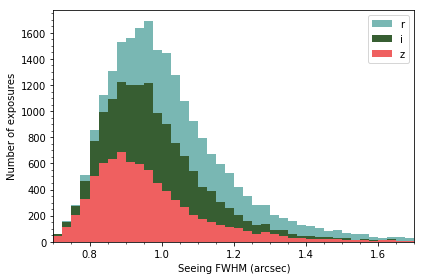

In [15]:
#plot_seeing(fwhm_list)
fwhm=fwhm_list
fig = plt.figure()
plt.minorticks_on()
ax = fig.add_subplot(111)
print('median seeing in r = ',np.median(fwhm['r']))
print('median seeing in i = ',np.median(fwhm['i']))
print('median seeing in z = ',np.median(fwhm['z']))

riz = np.concatenate([fwhm['r'], fwhm['i'], fwhm['z']])
print('median seeing in riz = ',np.median(riz))

nbins = 40
range = (0.7, 1.7)
width = (range[1]-range[0])/nbins
n, bins, p = ax.hist([fwhm['z'],fwhm['i'],fwhm['r']], bins=nbins, range=range, 
                     histtype='barstacked', fill=True,
                     color=[c_2,c_3,c_23], width=width)
ax.set_xlabel('Seeing FWHM (arcsec)')
ax.set_ylabel('Number of exposures')
ax.legend(reversed(p), ['r', 'i', 'z'], loc='upper right')
ax.set_xlim(*range)
plt.tight_layout()
plt.savefig('seeing.pdf')
plt.show()




import pickle
def save_obj( name,obj ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

save_obj('../final_plots_paper/everything_for_seeing',fwhm)    
